In [2]:
from Likelihood import LEff

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
LEff_v = np.vectorize(LEff, otypes=[float])

# First experiment: fix sigma

In [4]:
mu_s = np.linspace(0.1, 5, 50)[..., np.newaxis]

sigma2_s = np.linspace(0, 3, 4)[..., np.newaxis].T
labels = [f'$\\sigma^2$ = {sigma2:.2g}' for sigma2 in sigma2_s[0]]

out_Leff = Leff_v(0., mu_s, sigma2_s)

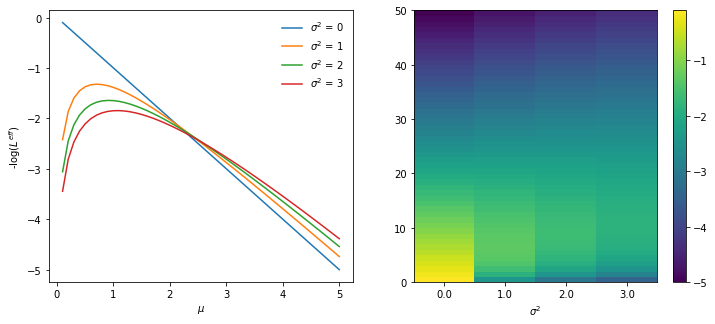

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
lines = plt.plot(mu_s, out_Leff, label=labels)
plt.legend(handles=lines, labels=labels, frameon=False)
plt.xlabel('$\mu$')
plt.ylabel(r'-$\log(L^{eff})$')

plt.subplot(122)
plt.pcolormesh(out_Leff)
plt.xticks(ticks=np.arange(0.5, len(sigma2_s[0])),
          labels=sigma2_s[0])
plt.xlabel('$\\sigma^2$')

plt.colorbar()

# Second experiment: fix relative uncertainty

In [12]:
mu_s = np.linspace(0.1, 20, 200)[..., np.newaxis]
relative_sigma_s = np.linspace(0, 1, 5)[..., np.newaxis].T
sigma2_s = (relative_sigma_s * mu_s)**2

labels = [f'$\\sigma/\mu$ = {relative_sigma:.2g}' for relative_sigma in relative_sigma_s[0]]

out_Leff = Leff_v(0., mu_s, sigma2_s)

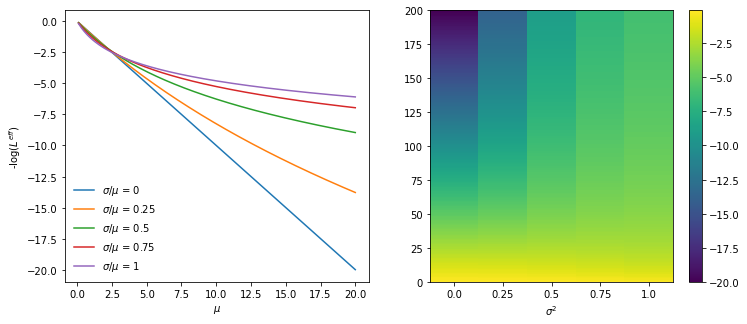

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
lines = plt.plot(mu_s, out_Leff, label=labels)
plt.legend(handles=lines, labels=labels, frameon=False)
plt.xlabel('$\mu$')
plt.ylabel(r'-$\log(L^{eff})$')

plt.subplot(122)
plt.pcolormesh(out_Leff)
plt.xticks(ticks=np.arange(0.5, len(relative_sigma_s[0])),
          labels=relative_sigma_s[0])
plt.xlabel('$\\sigma^2$')

plt.colorbar()

In [14]:
out_Leff_lin = np.exp(out_Leff)
cum_posterior = np.cumsum(out_Leff_lin, axis=0)
cum_posterior /= cum_posterior[-1, :]

Text(0, 0.5, 'cumulative posterior')

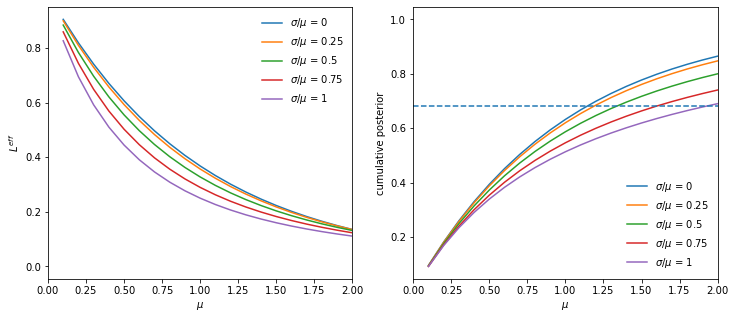

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
lines = plt.plot(mu_s, out_Leff_lin, label=labels)
plt.legend(handles=lines, labels=labels, frameon=False)
plt.xlabel('$\mu$')
plt.xlim(0, 2)
plt.ylabel(r'$L^{eff}$')

plt.subplot(122)
lines = plt.plot(mu_s, cum_posterior, label=labels)
plt.legend(handles=lines, labels=labels, frameon=False)
plt.xlabel('$\mu$')
plt.xlim(0, 2)
plt.axhline(0.68, linestyle='--')
plt.ylabel(r'cumulative posterior')

In [16]:
mu_hat = []
for i, sigma in enumerate(relative_sigma_s[0]):
    mu_hat.append(np.interp([0.68, 0.90, 0.99], cum_posterior[:, i], mu_s[:, 0]))
#     aux = np.interp([0.68, 0.90, 0.99], cum_posterior[:, i], mu_s[:, 0])
#     print(f'$\\sigma/\mu$ = {sigma}, 68% limit = {aux[0]:.3g}, 95% limit = {aux[1]:.3g}')

Text(0, 0.5, 'Upper limit on $\\mu$')

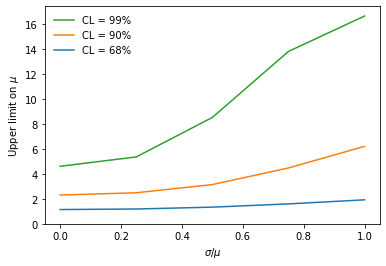

In [17]:
lines = plt.plot(relative_sigma_s[0], np.asarray(mu_hat))
plt.legend(handles=lines[::-1], 
           labels=[f'CL = {100*cl:.2g}%' for cl in [0.68, 0.90, 0.99]][::-1], 
           frameon=False)
plt.ylim(bottom=0)
plt.xlabel(f"$\\sigma/\mu$")
plt.ylabel(f'Upper limit on $\mu$')

# Third experiment, add systematic uncertainties

## In quadrature

In [64]:
mu_s = np.linspace(0.1, 20, 200)[..., np.newaxis]
relative_sigma_s = np.linspace(0, 1, 20)[..., np.newaxis].T
sigma2_s = (relative_sigma_s * mu_s)**2

labels = [f'$\\sigma/\mu$ = {relative_sigma:.2g}' for relative_sigma in relative_sigma_s[0]]

out_Leff = Leff_v(0., mu_s, sigma2_s)

In [25]:
out_Leff_lin = np.exp(out_Leff)
cum_posterior = np.cumsum(out_Leff_lin, axis=0)
cum_posterior /= cum_posterior[-1, :]

In [26]:
mu_hat = []
for i, sigma in enumerate(relative_sigma_s[0]):
    mu_hat.append(np.interp([0.68, 0.90, 0.99], cum_posterior[:, i], mu_s[:, 0]))

Text(0, 0.5, 'Upper limit on $\\mu$')

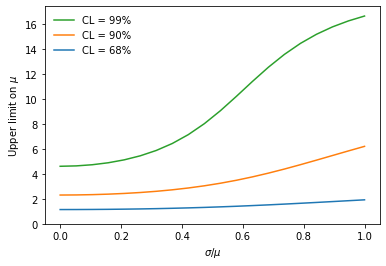

In [27]:
lines = plt.plot(relative_sigma_s[0], np.asarray(mu_hat))
plt.legend(handles=lines[::-1], 
           labels=[f'CL = {100*cl:.2g}%' for cl in [0.68, 0.90, 0.99]][::-1], 
           frameon=False)
plt.ylim(bottom=0)
plt.xlabel(f"$\\sigma/\mu$")
plt.ylabel(f'Upper limit on $\mu$')

In [13]:
syst = 0.3

relative_sigma = 0.2
mu_base = 4

In [14]:
nu = np.random.normal(1, syst, 1000).clip(0)
mus = mu_base * nu
sigma2 = (mus * relative_sigma)**2

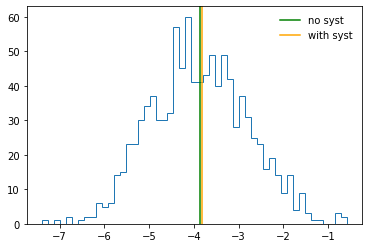

In [17]:
plt.hist(leff, bins=51, histtype='step')
plt.axvline(LEff(0, mu_base, (mu_base * relative_sigma)**2), color='green', label='no syst')
plt.axvline(LEff_v(0, mus, sigma2).mean(), color='orange', label='with syst')
plt.legend(frameon=False)

Text(0, 0.5, 'Posterior density')

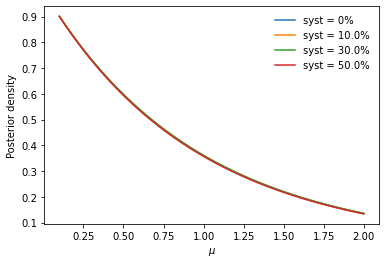

In [89]:
plt.plot(mu_s, np.exp(Leff_v(0, mu_s, sigma2_s)), label='syst = 0%')
for syst in [0.1, 0.3, 0.5]:
    nu_s = np.random.normal(1, syst, 1000).clip(0).T
    out_leff = Leff_v(0, mu_s*nu_s, (relative_sigma * mu_s * nu_s)**2)
    plt.plot(mu_s, np.exp(out_leff.mean(axis=1)), label=f'syst = {100*syst}%')
plt.legend(frameon=False)
plt.xlabel(r'$\mu$')
plt.ylabel('Posterior density')